1. **Kaggle link**

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dawoodsamad","key":"9810f694cb96d46ff3780400f3cc04f2"}'}

2. **Data Set Insertion and unzip**

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

!unzip fake-and-real-news-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 1.13GB/s]
Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


3. **Quick Look of Data Set**

In [3]:
import pandas as pd

fake_df = pd.read_csv("Fake.csv")
real_df = pd.read_csv("True.csv")

print("Fake News Sample:")
print(fake_df.head())

print("\nReal News Sample:")
print(real_df.head())


Fake News Sample:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  

Real News Sample:
                                               title  \
0  As U.S. budget fight looms, Republicans flip


4. **Combine Datasets and Label**
*   label = 0 for fake news
*   label = 1 for real news



```

```



In [4]:
fake_df['label'] = 0
real_df['label'] = 1

news_df = pd.concat([fake_df, real_df], ignore_index=True)

news_df = news_df.sample(frac=1).reset_index(drop=True)

print(news_df.shape)
print(news_df.head())


(44898, 5)
                                               title  \
0  German lawmakers visit Turkish air base but di...   
1  Trump's go-to man Bannon takes hardline view o...   
2  DEMOCRATS CONVENIENTLY FORGET 6,000 Prisoners ...   
3  Be careful, murdered Iranian activist's daught...   
4   WATCH: Bill Maher Shuts Down Former RNC Chair...   

                                                text       subject  \
0  BERLIN (Reuters) - German politicians visited ...     worldnews   
1  WASHINGTON (Reuters) - When Donald Trump’s adm...  politicsNews   
2  Democrats are calling for President Trump s sc...     left-news   
3  THE HAGUE (Reuters) - The daughter of an Irani...     worldnews   
4  During a panel segment on Real Time with Bill ...          News   

                 date  label  
0  September 8, 2017       1  
1   January 30, 2017       1  
2        Aug 27, 2017      0  
3  December 12, 2017       1  
4       June 25, 2016      0  


5. **Basic Cleaning**
*   Lowercasing
*   Removing punctuation and numbers
*   Removing extra spaces




In [5]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

news_df['text'] = news_df['text'].apply(clean_text)

news_df.head()


,title,text,subject,date,label
0,German lawmakers visit Turkish air base but di...,berlin reuters german politicians visited thei...,worldnews,"September 8, 2017",1
1,Trump's go-to man Bannon takes hardline view o...,washington reuters when donald trumps administ...,politicsNews,"January 30, 2017",1
2,"DEMOCRATS CONVENIENTLY FORGET 6,000 Prisoners ...",democrats are calling for president trump s sc...,left-news,"Aug 27, 2017",0
3,"Be careful, murdered Iranian activist's daught...",the hague reuters the daughter of an iranian a...,worldnews,"December 12, 2017",1
4,WATCH: Bill Maher Shuts Down Former RNC Chair...,during a panel segment on real time with bill ...,News,"June 25, 2016",0


6. **Remove Stopwords ( Common but Meaningless Words )**
   

- Using NLTK library for stopwords removal.





In [6]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

news_df['text'] = news_df['text'].apply(remove_stopwords)

news_df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,text,subject,date,label
0,German lawmakers visit Turkish air base but di...,berlin reuters german politicians visited coun...,worldnews,"September 8, 2017",1
1,Trump's go-to man Bannon takes hardline view o...,washington reuters donald trumps administratio...,politicsNews,"January 30, 2017",1
2,"DEMOCRATS CONVENIENTLY FORGET 6,000 Prisoners ...",democrats calling president trump scalp pardon...,left-news,"Aug 27, 2017",0
3,"Be careful, murdered Iranian activist's daught...",hague reuters daughter iranian arab activist k...,worldnews,"December 12, 2017",1
4,WATCH: Bill Maher Shuts Down Former RNC Chair...,panel segment real time bill maher friday nigh...,News,"June 25, 2016",0


7.  **Lemmatization** (Convert words to base form)

- This helps reduce word variations like running → run.

In [7]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

news_df['text'] = news_df['text'].apply(lemmatize_text)

news_df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,title,text,subject,date,label
0,German lawmakers visit Turkish air base but di...,berlin reuters german politician visited count...,worldnews,"September 8, 2017",1
1,Trump's go-to man Bannon takes hardline view o...,washington reuters donald trump administration...,politicsNews,"January 30, 2017",1
2,"DEMOCRATS CONVENIENTLY FORGET 6,000 Prisoners ...",democrat calling president trump scalp pardone...,left-news,"Aug 27, 2017",0
3,"Be careful, murdered Iranian activist's daught...",hague reuters daughter iranian arab activist k...,worldnews,"December 12, 2017",1
4,WATCH: Bill Maher Shuts Down Former RNC Chair...,panel segment real time bill maher friday nigh...,News,"June 25, 2016",0


**Text Vectorization and Model Training**

8. **Text Vectorization (TF-IDF)**


*   TF-IDF converts text to numeric vectors by highlighting important words.




In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(news_df['text'])

print(f"TF-IDF matrix shape: {X.shape}")


TF-IDF matrix shape: (44898, 5000)


9. **Prepare Labels**

In [9]:
y = news_df['label']


10. **Train-Test Split**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


11. **Train a Machine Learning Model**



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9899777282850779

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



11. **Visualize Confusion Matrix**

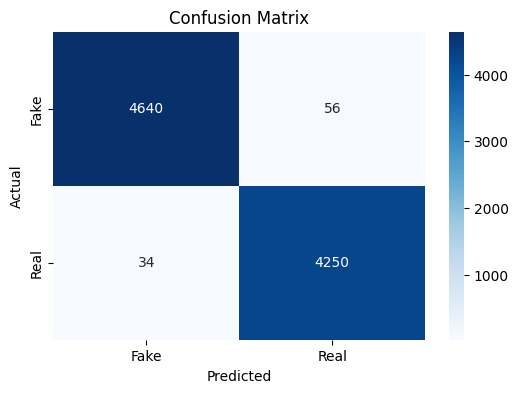

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Fake','Real'],
            yticklabels=['Fake','Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Train Other ML Models (Random Forest & SVM)**

 1. **Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.998218262806236

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



2. **Support Vector Machine (SVM)**

In [14]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))


SVM Accuracy: 0.9959910913140312

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



**Gradio App (Use Best Performing Model)**


In [16]:
import gradio as gr

def predict_news(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text)
    vector = vectorizer.transform([text])
    prediction = svm_model.predict(vector)[0]
    return "Real News" if prediction == 1 else "Fake News"

interface = gr.Interface(fn=predict_news,
                         inputs="text",
                         outputs="text",
                         title="📰 Fake News Detector",
                         description="Enter a news article or headline to check if it's fake or real.")

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f17a79041569097141.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [15]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.5 MB/s eta 0:00:00
